# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_split = 23 y n_repeats = 7.

In [1]:
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score

<AxesSubplot:xlabel='Year'>

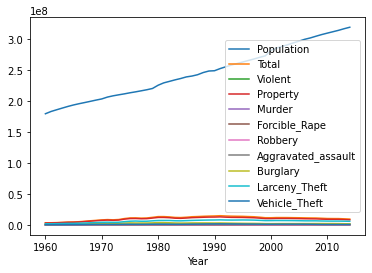

In [2]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [3]:
dt= df.drop(columns=["Population", "Total"])
dt

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,
1960,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


In [4]:
dt.reset_index("Year", inplace=True)
dt

,Year,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


<AxesSubplot:>

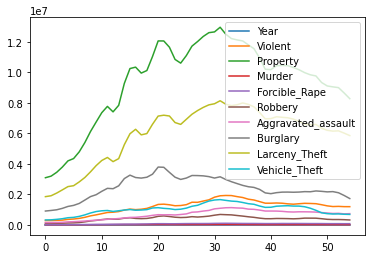

In [6]:
#mejorar
dt.plot()

<AxesSubplot:>

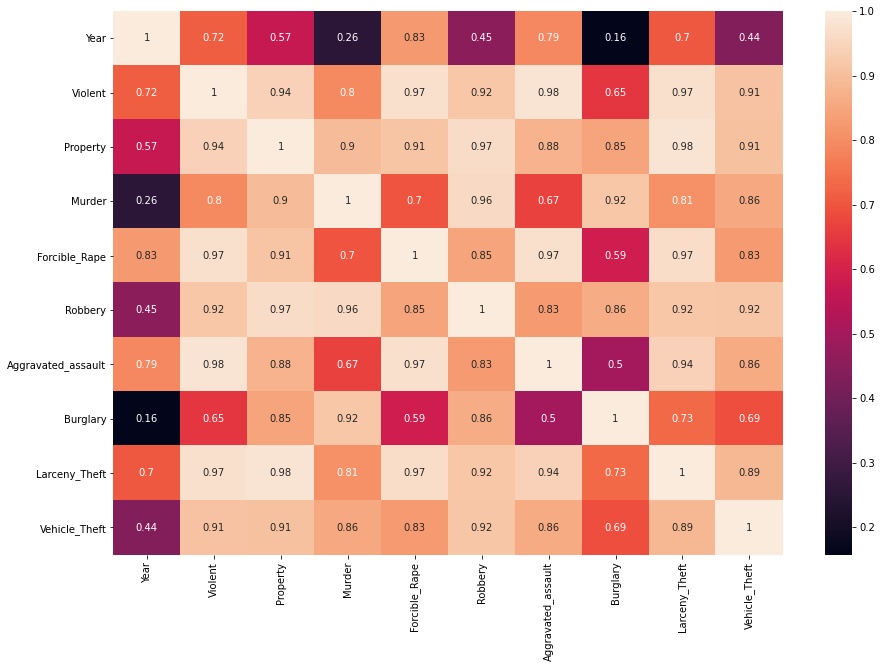

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(), annot=True)

5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_split = 23 y n_repeats = 7.

In [23]:
dt.corr()["Murder"].sort_values(ascending= False)

Murder                1.000000
Robbery               0.960156
Burglary              0.920207
Property              0.895641
Vehicle_Theft         0.856600
Larceny_Theft         0.806279
Violent               0.795300
Forcible_Rape         0.699655
Aggravated_assault    0.668511
Year                  0.256010
Name: Murder, dtype: float64

In [5]:
X = dt[["Robbery", "Burglary", "Property", "Vehicle_Theft", "Larceny_Theft"]]
X.shape

(55, 5)

In [6]:
y= np.array(dt["Murder"])
y.shape

(55,)

In [7]:
#Cross-validation, como utilizarla aqui? 
polinominal_model = PolynomialFeatures(6) 
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [8]:
k_fold = RepeatedKFold(n_splits=23, n_repeats=7, random_state=1)
polinominal_model = PolynomialFeatures(6)
X_poly = polinominal_model.fit_transform(X_train, y_train) 
error_val = []
for i, (train, val) in enumerate(k_fold.split(X_poly)): #accedo a los trocitos del kfold
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred_train = lin_reg_model.predict(X_poly)
    error_train = y_train[train] - y_pred_train[train] # esto es igual que el MAE 
print("Score:", r2_score(y_train, y_pred_train))
print(error_train)   
#MAE


Score: 0.9999999996941287
[-0.06878166  0.02256532 -0.09427599 -0.05661635  0.02717348 -0.03416686
  0.13371416  0.09888978  0.10391756  0.05055376  0.01132794  0.01170849
 -0.0818582   0.02471872 -0.09306578 -0.04617934 -0.06531004 -0.04873519
  0.01709838  0.08837231 -0.01290755  0.0059485   0.02058129  0.11196752
  0.01180665 -0.02026419  0.02692171 -0.0965753  -0.0083261   0.02439256
 -0.02746062 -0.04348616 -0.00346671  0.19714303 -0.05148654  0.04549928
  0.01655336  0.10330339 -0.06864218  0.01317196 -0.08328871  0.01627275
 -0.18565421]


In [9]:
y_train[val]

array([9110], dtype=int64)

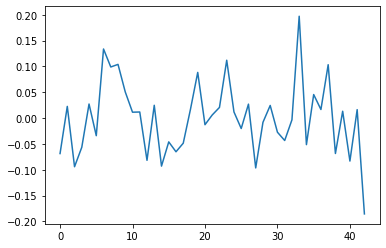

In [14]:
import matplotlib.pyplot as plt
plt.plot(error_train)


## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_splits = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".